In [1]:
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('C:/Users/bits-wilp/OneDrive - Lupa Systems/Swarna/Unsupervised learning/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,Male,19,39
1,2,Male,21,81
2,3,Female,20,6
3,4,Female,23,77
4,5,Female,31,40


In [3]:
df.shape

(200, 4)

In [4]:
df.describe()

,CustomerID,Age,Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,38.850000,50.200000
std,57.879185,13.969007,25.823522
min,1.000000,18.000000,1.000000
25%,50.750000,28.750000,34.750000
50%,100.500000,36.000000,50.000000
75%,150.250000,49.000000,73.000000
max,200.000000,70.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Spending Score (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Visualisation of Data')

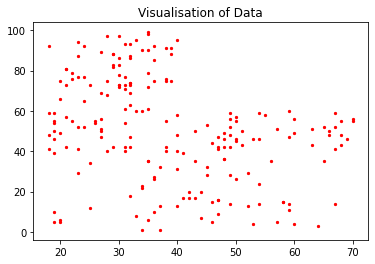

In [7]:
#getting the values and plotting it
f1 = df['Age'].values
f2 = df['Spending Score (1-100)'].values
plt.scatter(f1,f2,c='red',s=5)
plt.title('Visualisation of Data')


<b> Normalise the Dataset </b>

In [8]:
X = np.array(list(zip(f1,f2)))

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
StandardScaler().fit_transform(X)

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

<b> K-Means Clustering </b>

In [11]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans=kmeans.fit(X1)

In [12]:
#getting the cluster labels
labels = kmeans.predict(X1)
#Centroid Values and print them
centroids = kmeans.cluster_centers_
print(centroids)

[[46.16521739 32.88695652]
 [28.95294118 73.62352941]]


In [23]:
kmeans.inertia_

28165.583566629342

In [25]:
# The number of iterations required to converge
kmeans.n_iter_

6

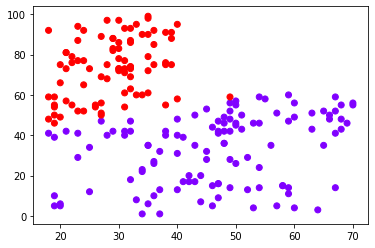

In [13]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_, cmap='rainbow')

In [14]:
inertia = []
K = range(1,10) 
for k in K:
    algorithm = (KMeans(n_clusters = k ,init='k-means++', n_init = 10 ,max_iter=300, 
                          random_state= 111) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

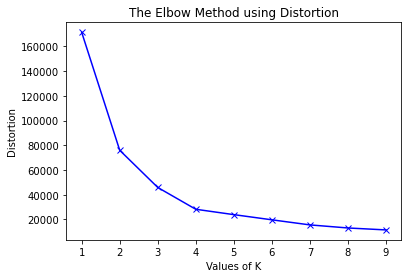

In [15]:
plt.plot(K, inertia, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [19]:

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans=kmeans.fit(X1)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


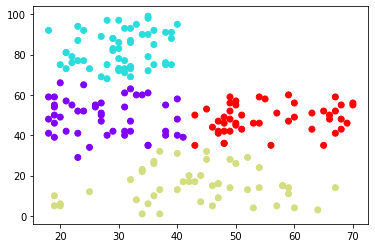

In [20]:
#getting the cluster labels
labels = kmeans.predict(X1)
#Centroid Values and print them
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_, cmap='rainbow')

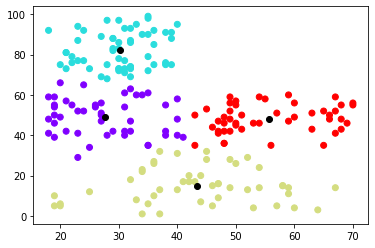

In [22]:
# 4.5 Plot the clusters with the centroids and the time take to fit! 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')